In [1]:
import pandas as pd
from datetime import datetime as dt
import datetime
from copy import deepcopy
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline


import gmplot
from geopy.geocoders import OpenCage, Nominatim, GoogleV3

In [2]:
def GenerateJupyterLink(FileLocation, LinkText):
    FileLocation = FileLocation.replace('\\','/')
    Link = '<a href="%s">%s</a>' % (FileLocation, LinkText +" - "+FileLocation)
    display(HTML(Link))

def printHTML_DF(dataframe):
        display(HTML(dataframe.to_html(escape=False)))
        

In [3]:
DataLocation = "E:\\Work\\Manjot\\2016_Yellow_Taxi_Trip_Data.csv"
OutputFolder = "E:\\Work\\Manjot\\Output\\"

In [4]:
RawData = pd.read_csv(DataLocation)
RawData = RawData[(RawData.pickup_longitude.notnull()) & RawData.dropoff_longitude.notnull()]

RawData = RawData.query('pickup_latitude != 0 or pickup_longitude != 0')
RawData = RawData.query('dropoff_latitude != 0 or dropoff_longitude != 0')

RawData['tpep_pickup_datetime'] = RawData['tpep_pickup_datetime'].apply(lambda x : dt.strptime(x, "%m/%d/%y %H:%M"))
RawData['tpep_dropoff_datetime'] = RawData['tpep_dropoff_datetime'].apply(lambda x : dt.strptime(x, "%m/%d/%y %H:%M"))
RawData['PickupMonth'] = RawData['tpep_pickup_datetime'].dt.month
RawData['DropoffMonth'] = RawData['tpep_dropoff_datetime'].dt.month

printHTML_DF(RawData.head(5))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID,PickupMonth,DropoffMonth
1,1,2016-02-09 19:08:00,2016-02-09 19:28:00,1,2.9,-73.986984,40.750744,1,Y,-73.977028,40.786922,1,15.0,1.0,0.5,4.20,0.00,0.3,21.00,NaN,NaN,2,2
2,1,2016-02-01 13:50:00,2016-02-01 13:55:00,1,1.2,-74.012428,40.706787,1,Y,-74.002739,40.718765,1,6.0,0.0,0.5,1.35,0.00,0.3,8.15,NaN,NaN,2,2
3,1,2016-02-27 15:14:00,2016-02-27 15:18:00,1,1.0,-74.000092,40.737709,1,Y,-74.002541,40.728539,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30,NaN,NaN,2,2
4,1,2016-02-10 13:34:00,2016-02-10 14:22:00,2,17.6,-73.790359,40.643837,2,Y,-73.982681,40.750008,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,NaN,NaN,2,2
5,1,2016-02-18 14:26:00,2016-02-18 15:20:00,2,16.4,-73.983658,40.755669,2,Y,-73.782074,40.644318,1,52.0,0.0,0.5,10.00,5.54,0.3,68.34,NaN,NaN,2,2


In [5]:
round_num = 2
Locations = RawData[['pickup_longitude','pickup_latitude']].rename(columns = {'pickup_longitude':'longitude', 'pickup_latitude':'latitude'})
Locations2 = RawData[['dropoff_longitude','dropoff_latitude']].rename(columns = {'dropoff_longitude':'longitude', 'dropoff_latitude':'latitude'})
Locations = pd.concat([Locations,Locations2], ignore_index=True).round(round_num)

Locations = Locations.drop_duplicates()

Locations.to_excel(OutputFolder + "RawLocations.xlsx", index=False)

In [6]:
q=0
Encoder_OpenCage = OpenCage(api_key ='afa174d328b0405486d75341c3c43a60')
Encoder_Nominatim = Nominatim()
Encoder_Google = GoogleV3()

def MapLocation(x):
    global q
    LocatorString = str(x['latitude'])+","+str(x['longitude'])
    try:
        location = Encoder_Nominatim.reverse(LocatorString)
        if pd.isnull(location.address):
            raise ValueError("Location Not Found")
        print(str(q)+" "+str(location.address))
        q=q+1
        return location.address
    except Exception as e1:
        print(e1)
        try:
            location = Encoder_OpenCage.reverse(LocatorString)[0]
            if pd.isnull(location.address):
                raise ValueError("Location Not Found")
            print(str(q)+" "+str(location.address))
            q=q+1
            return location.address
        except Exception as e2:
            print(e2)
            try:
                location = Encoder_Google.reverse(LocatorString)[0]
                if pd.isnull(location.address):
                    raise ValueError("Location Not Found")
                print(str(q)+" "+str(location.address))
                q=q+1
                return location.address
            except Exception as e3:
                print(e3)
                return None

In [8]:
# Do not run this unless your data has changed. Takes a long long time to run
Locations['Address'] = Locations.apply(MapLocation, axis=1)
Locations.to_excel(OutputFolder + "LocationMap.xlsx", index=False)

0 None
1 137, West 33rd Street, Koreatown, Manhattan Community Board 5, New York County, NYC, New York, 10001, United States of America
2 175, Broadway, Tribeca, Manhattan Community Board 1, New York County, NYC, New York, 10007, United States of America
3 218, West 16th Street, Chelsea, Manhattan Community Board 4, New York County, NYC, New York, 10011, United States of America
4 C65, Terminal 2 Departures, Bayswater, Queens County, NYC, New York, 11434, United States of America
5 1270 Avenue of the Americas, 1270, 6th Avenue, Diamond District, Manhattan Community Board 5, New York County, NYC, New York, 10020, United States of America
6 1720, 2nd Avenue, Yorkville, Manhattan Community Board 8, New York County, NYC, New York, 10128, United States of America
7 377, Greenwich Street, Tribeca, Manhattan Community Board 1, New York County, NYC, New York, 10013, United States of America
8 Filomen D'agostino Residence Hall, 110, West 3rd Street, NoHo Historic District, Manhattan Community B

68 70, Malcolm X Boulevard, Harlem, Manhattan Community Board 10, New York County, NYC, New York, 10026, United States of America
69 96, Schermerhorn Street, Brooklyn Heights, Kings County, NYC, New York, 11201, United States of America
70 47-45, 45th Street, Sunnyside Gardens, Queens County, NYC, New York, 11377, United States of America
71 424, 4th Street, Park Slope, BK, Kings County, NYC, New York, 11215, United States of America
Service timed out
72 55th Avenue, New York City, NY 11101, United States of America
73 1030, Atlantic Avenue, Prospect Heights, BK, Kings County, NYC, New York, 11238, United States of America
74 Manhattan Community Board 8, New York County, NYC, New York, 10017, United States of America
75 148-15, 130th Avenue, Cedar Manor Houses, Queens County, NYC, New York, 11436, United States of America
76 27-00, 27th Street, LIC, Queens County, NYC, New York, 11101, United States of America
77 East River Esplanade, Kips Bay, Manhattan Community Board 6, New York Cou

143 1032, Park Avenue, Hoboken, Hudson County, New Jersey, 07030, United States of America
144 River Terrace, Battery Park City, Manhattan Community Board 1, New York County, NYC, New York, 10006, United States of America
145 88-11, 31st Avenue, Jackson Heights, Queens County, NYC, New York, 11369, United States of America
146 Forest Hills Stadium, 69th Avenue, Forest Hills Gardens, Queens County, NYC, New York, 11375, United States of America
147 35-11, 62nd Street, Woodside, Queens County, NYC, New York, 11377, United States of America
148 445, East 19th Street, Ditmas Park, BK, Kings County, NYC, New York, 11226, United States of America
149 110-34, Saultell Avenue, Corona, Queens County, NYC, New York, 11368, United States of America
150 Neilson Street, New Brunswick, Middlesex County, New Jersey, 08901, United States of America
151 30-43, 47th Street, Sunnyside Gardens, Queens County, NYC, New York, 11103, United States of America
152 Roosevelt Island Greenway, Yorkville, Manhatta

221 137-02, 68th Drive, Hyde Park Gardens, Queens, Queens County, NYC, New York, 11367, United States of America
222 2127, Hughes Avenue, East Tremont, Bronx, Bronx County, NYC, New York, 10457, United States of America
223 325, Classon Avenue, Clinton Hill, BK, Kings County, NYC, New York, 11205, United States of America
224 301, Washington Street, Hoboken, Hudson County, New Jersey, 07030, United States of America
225 32, Selleck Street, Stamford, Fairfield County, Connecticut, 06902, United States of America
226 2447, 3rd Avenue, Mott Haven, Bronx County, NYC, New York, 10451, United States of America
227 86-14, 37th Avenue, Jackson Heights, Queens County, NYC, New York, 11372, United States of America
228 9th Avenue, Manhattan Community Board 12, New York County, NYC, New York, 10034, United States of America
229 Paulus Hook Pier, Colgate Center, Jersey City, Hudson County, New Jersey, 07302, United States of America
230 1263, East 102nd Street, Canarsie, Kings County, NYC, New Yor

301 363, Wortman Avenue, Linden Houses, Kings County, NYC, New York, 11207, United States of America
302 1310, Avenue P, Midwood, BK, Kings County, NYC, New York, 11229, United States of America
303 Woodhaven Boulevard & 91st Avenue, Woodhaven Boulevard, Brooklyn Manor, Queens County, NYC, New York, 11417, United States of America
304 River Mews Lane, Edgewater, Bergen County, New Jersey, 07020, United States of America
305 Meadow Road, Inwood, Nassau County, New York, 11096, United States of America
306 326, 20th Street, South Slope, BK, Kings County, NYC, New York, 11215, United States of America
307 Taphouse, Hoboken Newport Walkway- Hudson River Waterfront Walkway, Colgate Center, Jersey City, Hudson County, New Jersey, 07302, United States of America
Service timed out
308 1240 Wheeler Avenue, New York City, NY 10472, United States of America
309 3138, Westchester Avenue, Pelham Bay, Bronx, Bronx County, NYC, New York, 10461, United States of America
310 626, Pine Street, East New 

379 3741, Hickory Street, Seaford, Nassau County, New York, 11783, United States of America
380 38, Amherst Court, Huntington, Suffolk County, New York, 11743, United States of America
Service timed out
381 Hackley School Driveway, Town of Greenburgh, NY 10523, United States of America
382 150-01, 95th Street, Ozone Park, Queens County, NYC, New York, 11417, United States of America
383 Grand Central Parkway, East Elmhurst, Queens County, NYC, New York, 11368, United States of America
384 702, East 39th Street, Brooklyn Community Board 17 Neighborhoods, BK, Kings County, NYC, New York, 11203, United States of America
385 Valentine Lane, Yonkers, Westchester County, New York, 10471, United States of America
386 205, East 198th Street, Bedford Park, Bronx, Bronx County, NYC, New York, 10458, United States of America
387 1706, Popham Avenue, Morris Heights, Bronx County, NYC, New York, 10453, United States of America
388 15, Belt Parkway, Kings County, NYC, New York, 11208, United States 

459 921, East 149th Street, Port Morris, Bronx County, NYC, New York, 10455, United States of America
460 1925, Powell Avenue, Unionport, Bronx, Bronx County, NYC, New York, 10472, United States of America
461 93-34, 217th Street, Queens Village, Queens County, NYC, New York, 11428, United States of America
462 555, West 239th Street, Fieldston, Bronx County, NYC, New York, 10471, United States of America
463 Henry Hudson Drive, Englewood Cliffs, Bergen County, New Jersey, 07632, United States of America
Service timed out
464 54-09 100th Street, New York City, NY 11368, United States of America
465 98, Soft Landings Lane, Edenville, Town of Warwick, Orange County, New York, 10990, United States of America
466 Bergen Avenue, Bergen Beach, Kings County, NYC, New York, 11234, United States of America
467 2410, Madison Drive, East Meadow, Nassau County, New York, 11554, United States of America
468 378, 90th Street, Fort Hamilton, Kings County, NYC, New York, 11209, United States of Americ

539 Long Island Expressway, Melville, Suffolk County, New York, 11747, United States of America
540 Flagship Street, Bayonne, Hudson County, New Jersey, 07002, United States of America
541 1121, Westside Avenue, Tonnelle Circle, Jersey City, Hudson County, New Jersey, 07306, United States of America
Service timed out
542 100 Washington Avenue, Hempstead, NY 11530, United States of America
543 2029, East 12th Street, Midwood, BK, Kings County, NYC, New York, 11229, United States of America
Service timed out
544 Garden State Parkway, Woodcliff Lake, NJ 07423, United States of America
545 550, Chestnut Street, Orange, Essex County, New Jersey, 07050, United States of America
546 100, West 195th Street, Kingsbridge Heights, Bronx, Bronx County, NYC, New York, 10468, United States of America
Service timed out
547 574 Clifton Avenue, Newark, NJ 07104, United States of America
548 270, East 172nd Street, Tremont, Bronx, Bronx County, NYC, New York, 10457, United States of America
549 3800, We

623 262-09, 60th Road, Glen Oaks, Queens County, NYC, New York, 11362, United States of America
624 La Quinta Inn and Suites, 350, Lighting Way, Mill Creek at Harmon Meadow, Secaucus, Hudson County, New Jersey, 07094, United States of America
Service timed out
625 67 Toler Place, Newark, NJ 07114, United States of America
626 East Gate Drive, West Hills, Suffolk County, New York, 11743, United States of America
627 212-20, Northern Boulevard, Oakland Gardens, Queens, Queens County, NYC, New York, 11361, United States of America
628 East 69th Street, Bergen Beach, Kings County, NYC, New York, 11234, United States of America
629 63, Sheridan Avenue, Ho-Ho-Kus, Bergen County, New Jersey, 07423, United States of America
630 Maxess Road, Melville, Suffolk County, New York, 11747, United States of America
631 3012, Radcliff Avenue, Williams Bridge, Bronx, Bronx County, NYC, New York, 10469, United States of America
632 1935, West 8th Street, Gravesend, Kings County, NYC, New York, 11223, Uni

705 15th Avenue, College Point, Queens County, NYC, New York, 11356, United States of America
706 2, Trudy Drive, Lodi, Bergen County, New Jersey, 07644, United States of America
707 601, Adee Avenue, Williams Bridge, Bronx, Bronx County, NYC, New York, 10467, United States of America
708 4, Roslyn West Shore Road, Port Washington, Nassau County, New York, 11050, United States of America
709 JFK Boulevard at 27th Street, John F. Kennedy Boulevard, Bayonne, Hudson County, New Jersey, 07305, United States of America
710 598, Maple Drive West, North New Hyde Park, Nassau County, New York, 11040, United States of America
711 Metro Way, Secaucus, Hudson County, New Jersey, 07094, United States of America
712 Park Plaza Drive, The Plaza at Harmon Meadows, Secaucus, Hudson County, New Jersey, 07094, United States of America
713 90-49, 181st Street, Hillside, Queens, Queens County, NYC, New York, 11423, United States of America
714 1523, W 6 St, Gravesend, BK, Kings County, NYC, New York, 1120

786 127-40, Willets Point Boulevard, Corona, Queens, Queens County, NYC, New York, 11368, United States of America
787 Weehawken Cemetery, Bergen Turnpike, Union City, Hudson County, New Jersey, 07047, United States of America
788 Van Brunt Street, Red Hook, Kings County, NYC, New York, 11231, United States of America
789 40-36, 192nd Street, Bayside, Queens, Queens County, NYC, New York, 11358, United States of America
790 2301, Colden Avenue, Morris Park, Bronx, Bronx County, NYC, New York, 10469, United States of America
791 563, Nugent Avenue, Midland Beach, Todt Hill, Richmond County, NYC, New York, 10305, United States of America
792 84, Emanuel Street, East Hanover, Morris County, New Jersey, 07936, United States of America
793 B'nal Jeshurum and Shereth Israel Cemetery, Cypress Hills Street, Glendale, Queens County, NYC, New York, 11208, United States of America
794 Belt Parkway Bike Path, Bath Beach, Kings County, NYC, New York, 11214, United States of America
Service timed ou

866 Ironwood Drive, Southfields, Town of Tuxedo, Orange County, New York, 10987, United States of America
Service timed out
867 Sharp Hill Road, Wilton, CT 06897, United States of America
868 65, Indian Harbor Drive, Greenwich, Fairfield County, Connecticut, 06830, United States of America
869 NJ 18, New Brunswick, Middlesex County, New Jersey, 08901, United States of America
870 39, Central Park Avenue N, Yonkers, Westchester County, New York, 10710, United States of America
871 Harrison, Town of Harrison, Westchester County, New York, 10528, United States of America
872 60-78, 69th Place, Middle Village, Queens County, NYC, New York, 11378, United States of America
873 472, Battery Road, Fort Wadsworth, Todt Hill, Richmond County, NYC, New York, 10305, United States of America
874 135-24, 246th Street, Springfield Gardens, Queens County, NYC, New York, 11422, United States of America
875 2021, East 69th Street, Bergen Beach, BK, Kings County, NYC, New York, 11234, United States of Am

946 DD, D10 Jetway, North Beach, Queens County, NYC, New York, 11356, United States of America
947 29-36, 165th Street, Murray Hill, Queens, Queens County, NYC, New York, 11358, United States of America
948 109-14, Liverpool Street, Jamaica, Queens County, NYC, New York, 11435, United States of America
949 London Road, Richmond, Staten Island, Todt Hill, Richmond County, NYC, New York, 10306, United States of America
950 2703, West 33rd Street, Coney Island, Kings County, NYC, New York, 11224, United States of America
951 158-29, Cross Bay Boulevard, Howard Beach, Queens County, NYC, New York, 11414, United States of America
952 2017, East 37th Street, Flatlands, BK, Kings County, NYC, New York, 11234, United States of America
953 141-28, 184th Street, Laurelton, Queens County, NYC, New York, 11413, United States of America
954 601, Cross Bay Boulevard, Broad Channel, Somerville, Queens County, NYC, New York, 11693, United States of America
955 99, Ann Court, Freeport, Nassau County, N

1025 629, Richmond Hill Road, Heartland Village, Staten Island, Todt Hill, Richmond County, NYC, New York, 10314, United States of America
1026 Super Stop & Shop, 70-20, Rockaway Beach Boulevard, The Breakers, Arverne By The Sea, Queens County, NYC, New York, 11692, United States of America
1027 Princeton Road, Old Bridge Township, Middlesex County, New Jersey, 08859, United States of America
1028 3898, US 46, Mountain Lakes, Morris County, New Jersey, 07054, United States of America
1029 50-14, Concord Street, Little Neck, Queens County, NYC, New York, 11362, United States of America
1030 4523, Barnes Avenue, Wakefield, Bronx, Bronx County, NYC, New York, 10466, United States of America
1031 40, Stony Hollow Road, Greenlawn, Suffolk County, New York, 11721, United States of America
1032 3, North Drive, Plandome, Nassau County, New York, 11030, United States of America
1033 Jersey Gardens Boulevard, Jersey Gardens Mall, Elizabeth, Union County, New Jersey, 07201, United States of Ameri

1104 138, Hudson Street, Pelham Manor, Town of Pelham, Westchester County, New York, 10803, United States of America
1105 Hempstead Gardens Drive, West Hempstead, Nassau County, New York, 11552, United States of America
1106 224, Mosel Avenue, Concord, Todt Hill, Richmond County, NYC, New York, 10304, United States of America
1107 Whitestone Bridge (Toll), Malba, Queens County, NYC, New York, 10473, United States of America
1108 138, Wykagyl Terrace, New Rochelle, Westchester County, New York, 10804, United States of America
1109 Kings County, NYC, New York, 11234, United States of America
1110 36, Dearborne Street, Yonkers, Westchester County, New York, 10710, United States of America
1111 85, Jarombek Drive, Montville Township, Morris County, New Jersey, 07082, United States of America
1112 324, Grant Avenue, Woodmere, Nassau County, New York, 11598, United States of America
1113 92, Witherall Street, Yonkers, Westchester County, New York, 10708, United States of America
1114 Indian 

1184 Doctor John Howard Junior Elementary School, Lincoln Street, East Orange, Essex County, New Jersey, 07017, United States of America
1185 439, West Madison Avenue, Dumont, Bergen County, New Jersey, 07628, United States of America
1186 Beach 43rd Street, Sea Gate, Kings County, NYC, New York, 11224, United States of America
1187 83, Waterside Lane, Plandome Heights, Nassau County, New York, 11030, United States of America
Service timed out
1188 135 Shu Swamp Road, Mill Neck, NY 11560, United States of America
1189 48, Leonard Terrace, Roseland, Essex County, New Jersey, 07068, United States of America
1190 Horseshoe Hill Road West, Pound Ridge, Town of Pound Ridge, Westchester County, New York, 10576, United States of America
1191 62, Peru Street, Castleton Corners, Staten Island, Todt Hill, Richmond County, NYC, New York, 10314, United States of America
1192 Alder Way, Armonk, Town of North Castle, Westchester County, New York, 10504, United States of America
1193 60, Mount Prospe

1265 477, Yonkers Avenue, Yonkers, Westchester County, New York, 10704, United States of America
1266 10, Roosevelt Avenue, Ridgefield Park, Bergen County, New Jersey, 07660, United States of America
1267 Oceanside, Nassau County, New York, 11572, United States of America
1268 3312, Milburn Avenue, Baldwin Harbor, Nassau County, New York, 11510, United States of America
1269 15, Stockton Street, Newark, Essex County, New Jersey, 07105, United States of America
1270 144, Devon Road, Yonkers, Westchester County, New York, 10708, United States of America
1271 228, Henderson Avenue, New Brighton, Richmond County, NYC, New York, 10301, United States of America
1272 Burger King, Broadway, Teachers Village, Newark, Essex County, New Jersey, 07104, United States of America
1273 35, Ridge Loop, Dongan Hills, Todt Hill, Richmond County, NYC, New York, 10304, United States of America
1274 113, East Broadway, Richmond, Staten Island, Todt Hill, Richmond County, NYC, New York, 10306, United States 

1346 Harrison, Town of Harrison, Westchester County, New York, 10577, United States of America
1347 6, Hawke Lane, Rockville Centre, Nassau County, New York, 11570, United States of America
1348 24, Wayside Lane, North Wantagh, Nassau County, New York, 11793, United States of America
1349 163-10, 20th Avenue, Beechhurst, Queens, Queens County, NYC, New York, 11357, United States of America
1350 457, Jauncey Avenue, North Arlington, Bergen County, New Jersey, 07071, United States of America
1351 1000, Huguenot Avenue, Huguenot, Richmond County, NYC, New York, 10312, United States of America
1352 629, Forest Avenue, West New Brighton, Todt Hill, Richmond County, NYC, New York, 10310, United States of America
1353 Bayside Avenue, Roxbury, Queens County, NYC, New York, 11697, United States of America
1354 115, Valley Avenue, Locust Valley, Nassau County, New York, 11560, United States of America
1355 Saint Paul the Apostle Catholic Church, McLean Avenue, Yonkers, Westchester County, New Yo

1426 1, Ash Street, Valley Stream, Nassau County, NYC, New York, 11580, United States of America
1427 2015, Maple Street, Baldwin, Nassau County, New York, 11510, United States of America
1428 35, Vanderbilt Avenue, Manhasset, Nassau County, New York, 11030, United States of America
1429 Sunningdale Country Club, Hawthorne Way, Woodlands, Town of Greenburgh, Westchester County, New York, 10530, United States of America
1430 2, Somerset Drive North, University Gardens, Nassau County, New York, 11020, United States of America
1431 84, Wycoff Street, Hicksville, Nassau County, New York, 11801, United States of America
1432 Heaptauga Lake, Haights Cross Road, Town of New Castle, Westchester County, New York, 10504, United States of America
1433 9, Teibrook Avenue, Syosset, Nassau County, New York, 11791, United States of America
1434 1057, Park Avenue, Baldwin, Nassau County, New York, 11510, United States of America
1435 Veterans Road West, Rossville, Richmond County, NYC, New York, 10309

1506 62, Maywood Avenue, Rye Brook, Town of Rye, Westchester County, New York, 10573, United States of America
1507 99, Fawn Lane, Armonk, Town of North Castle, Westchester County, New York, 10504, United States of America
1508 Edgewater, Bergen County, New Jersey, 07047, United States of America
1509 Woodbury Road, Woodbury, Nassau County, New York, 11791, United States of America
1510 2165, Hoffman Avenue, Elmont, Nassau County, New York, 11003, United States of America
1511 Shore Road Greenway, Co-Op City, Bronx County, NYC, New York, 10464, United States of America
1512 Famous Dave's, Corporate Drive, East Garden City, Nassau County, New York, 11530, United States of America
1513 23, Griffin Avenue, Scarsdale, Town of Mamaroneck, Westchester County, New York, 10583, United States of America
1514 184, Alexander Avenue, Montclair, Essex County, New Jersey, 07043, United States of America
1515 75, Manor Pond Lane, Irvington, Town of Greenburgh, Westchester County, New York, 10533, Uni

1587 Bedford Road, Sleepy Hollow, Town of Mount Pleasant, Westchester County, New York, 10570, United States of America
1588 11, Hewlett Lane, Flower Hill, Nassau County, New York, 11050, United States of America
1589 Arthur Kill Road, Rossville, Richmond County, NYC, New York, 10309, United States of America
1590 8, Myrtle Street, Rutherford, Bergen County, New Jersey, 07070, United States of America
1591 Gary Place, New Springville, Staten Island, Richmond County, NYC, New York, 10314, United States of America
1592 Cooper Avenue, Mamaroneck, Town of Mamaroneck, Westchester County, New York, 10543, United States of America
1593 250, North Westchester Avenue West, Harrison, Town of Harrison, Westchester County, New York, 10577, United States of America
1594 Hart Island Ferry, City Island, Bronx County, NYC, New York, 10464, United States of America
1595 297, Shoreward Drive, Thomaston, Nassau County, New York, 11021, United States of America
1596 Sutton Manor Lane, New Rochelle, Westch

1669 Hutchinson River Parkway, Scarsdale, Westchester County, New York, 10528, United States of America
1670 Industrial Avenue, Teterboro, Bergen County, New Jersey, 07608, United States of America
1671 Observatory Avenue, Woodlawn, Bronx, Bronx County, NYC, New York, 10463, United States of America


In [7]:
# Reading it in subsequent runs to ensure that time is saved
Locations = pd.read_excel(OutputFolder + "LocationMap.xlsx")

In [8]:
# Process the information 
Locations['LatLong'] = Locations['latitude'].astype(str) + ' , ' + Locations['longitude'].astype(str) 
Locations['Address'] = Locations['Address'].fillna(Locations['LatLong'])
Locations = Locations.drop(columns=['LatLong'])

# Mapping the various terminals of JFK manually
Locations.loc[(Locations['Address'].str.contains("Terminal", regex=False)) & (Locations['Address'].str.contains("11434", regex=False)),'Address'] = "John F Kennedy International Airport, Bayswater, Queens County, NYC, New York, 11434, United States of America"

Cols = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

for col in Cols:
    RawData[col+str("_round")] = RawData[col].round(round_num)

RawData = pd.merge(RawData, Locations.rename(columns ={'Address':'PickupAddress'}), how='left', left_on=['pickup_latitude_round','pickup_longitude_round'], right_on =['latitude','longitude']).drop(columns =['latitude','longitude'])
RawData = pd.merge(RawData, Locations.rename(columns ={'Address':'DropoffAddress'}), how='left', left_on=['dropoff_latitude_round','dropoff_longitude_round'], right_on =['latitude','longitude']).drop(columns =['latitude','longitude'])

printHTML_DF(RawData.head(5))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID,PickupMonth,DropoffMonth,pickup_longitude_round,pickup_latitude_round,dropoff_longitude_round,dropoff_latitude_round,PickupAddress,DropoffAddress
0,1,2016-02-09 19:08:00,2016-02-09 19:28:00,1,2.9,-73.986984,40.750744,1,Y,-73.977028,40.786922,1,15.0,1.0,0.5,4.20,0.00,0.3,21.00,NaN,NaN,2,2,-73.99,40.75,-73.98,40.79,"137, West 33rd Street, Koreatown, Manhattan Co...","The Normandy, 140, Riverside Drive, Upper West..."
1,1,2016-02-01 13:50:00,2016-02-01 13:55:00,1,1.2,-74.012428,40.706787,1,Y,-74.002739,40.718765,1,6.0,0.0,0.5,1.35,0.00,0.3,8.15,NaN,NaN,2,2,-74.01,40.71,-74.00,40.72,"175, Broadway, Tribeca, Manhattan Community Bo...","13, Crosby Street, SoHo, Manhattan Community B..."
2,1,2016-02-27 15:14:00,2016-02-27 15:18:00,1,1.0,-74.000092,40.737709,1,Y,-74.002541,40.728539,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30,NaN,NaN,2,2,-74.00,40.74,-74.00,40.73,"218, West 16th Street, Chelsea, Manhattan Comm...","Filomen D'agostino Residence Hall, 110, West 3..."
3,1,2016-02-10 13:34:00,2016-02-10 14:22:00,2,17.6,-73.790359,40.643837,2,Y,-73.982681,40.750008,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,NaN,NaN,2,2,-73.79,40.64,-73.98,40.75,"John F Kennedy International Airport, Bayswate...","35, East 38th Street, Manhattan Community Boar..."
4,1,2016-02-18 14:26:00,2016-02-18 15:20:00,2,16.4,-73.983658,40.755669,2,Y,-73.782074,40.644318,1,52.0,0.0,0.5,10.00,5.54,0.3,68.34,NaN,NaN,2,2,-73.98,40.76,-73.78,40.64,"1270 Avenue of the Americas, 1270, 6th Avenue,...","John F Kennedy International Airport, Bayswate..."


,No. of Pickups
PickupMonth,
January,60262
February,62412
March,63869
April,63386
May,61208
June,64904



Max Pickups are in the month of June


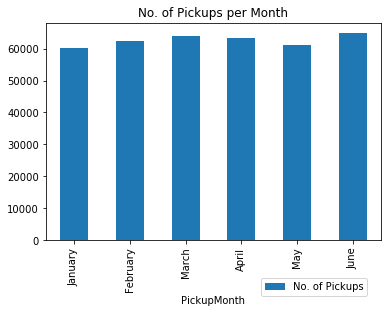

In [9]:
# Question 1
MonthlyPickupCount = RawData[['PickupMonth','tpep_pickup_datetime']].groupby('PickupMonth').count().rename(columns = {'tpep_pickup_datetime':'No. of Pickups'}).reset_index(drop=False) #Using tpep_pickup_datetime as a representative column
MonthlyPickupCount['PickupMonth'] = MonthlyPickupCount['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyPickupCount = MonthlyPickupCount.set_index('PickupMonth')
printHTML_DF(MonthlyPickupCount)
plt = MonthlyPickupCount.plot(kind='bar', title="No. of Pickups per Month")
plt.legend(loc=9, bbox_to_anchor=(0.8, -0.15))
print("\nMax Pickups are in the month of " + str(MonthlyPickupCount['No. of Pickups'].idxmax()))

,Max Pickups Slot,No. of Pickups
PickupMonth,,
January,15:00 - 21:00,22231
February,15:00 - 21:00,21472
March,15:00 - 21:00,21890
April,15:00 - 21:00,24826
May,15:00 - 21:00,20130
June,15:00 - 21:00,21738


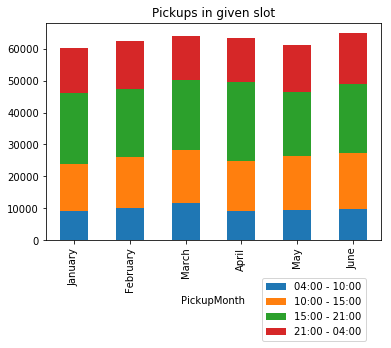

In [10]:
# Question 2

# I define slots as the following (9PM-4AM); (4AM-10AM); (10AM - 3PM) (3PM-9PM)

def bin_times(x):
    
    Time = x.time()
    
    if Time <= datetime.time(10):
        if Time <= datetime.time(4):
            slot = "21:00 - 04:00"
        else:
            slot = "04:00 - 10:00"
    elif Time <= datetime.time(15):
        slot = "10:00 - 15:00"
    elif Time<= datetime.time(21):
        slot = "15:00 - 21:00"
    else:
        slot = "21:00 - 04:00"
    
    return slot

RawData["PickupSlot"] = RawData["tpep_pickup_datetime"].apply(bin_times)
RawData["DropoffSlot"] = RawData["tpep_dropoff_datetime"].apply(bin_times)

MonthlyPickupSlotMaster = RawData[['PickupMonth','PickupSlot','tpep_pickup_datetime']].groupby(['PickupMonth', 'PickupSlot']).count().reset_index(drop=False)
MonthlyPickupSlot = MonthlyPickupSlotMaster.groupby(['PickupMonth']).apply(lambda x: x.loc[x['tpep_pickup_datetime'].idxmax()]).reset_index(drop=True).rename(columns = {'tpep_pickup_datetime':'No. of Pickups', 'PickupSlot':'Max Pickups Slot'})
MonthlyPickupSlot['PickupMonth'] = MonthlyPickupSlot['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyPickupSlot = MonthlyPickupSlot.set_index('PickupMonth')
printHTML_DF(MonthlyPickupSlot)


MonthlyPickupSlotMaster = MonthlyPickupSlotMaster.pivot(index="PickupMonth", columns = "PickupSlot", values = "tpep_pickup_datetime").reset_index(drop=False)

MonthlyPickupSlotMaster['PickupMonth'] = MonthlyPickupSlotMaster['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyPickupSlotMaster = MonthlyPickupSlotMaster.set_index('PickupMonth')
plt = MonthlyPickupSlotMaster.plot(kind='bar',stacked=True, title="Pickups in given slot")
plt.legend(loc=9, bbox_to_anchor=(0.8, -0.15))



,Longest Trip Distance
PickupMonth,
January,518.2
February,151694.0
March,19072628.8
April,261466.5
May,179.0
June,415.0



Longest Longest Distance Trip is in the month of March


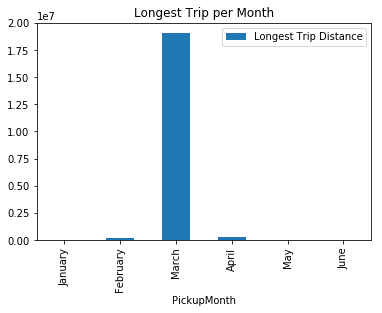

In [11]:
# Question 3
MonthlyLongest = RawData.groupby('PickupMonth').apply(lambda x: x.loc[x['trip_distance'].idxmax()]).rename(columns = {'trip_distance':'Longest Trip Distance'}).reset_index(drop=True)
MonthlyLongest['PickupMonth'] = MonthlyLongest['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyLongest = MonthlyLongest.set_index('PickupMonth')
printHTML_DF(MonthlyLongest[['Longest Trip Distance']])
MonthlyLongest[['Longest Trip Distance']].plot(kind = 'bar', title = "Longest Trip per Month")
print("\nLongest Longest Distance Trip is in the month of " + str(MonthlyLongest['Longest Trip Distance'].idxmax()))

In [12]:
# Question 4
printHTML_DF(MonthlyLongest[['PickupAddress','DropoffAddress','dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'Longest Trip Distance']])


,PickupAddress,DropoffAddress,dropoff_longitude,dropoff_latitude,fare_amount,Longest Trip Distance
PickupMonth,,,,,,
January,"Filomen D'agostino Residence Hall, 110, West 3...","203, East 72nd Street, Upper East Side, Manhat...",-73.963928,40.766205,15.50,518.2
February,"River Terrace, Battery Park City, Manhattan Co...","51 Astor Place, East 9th Street, East Village,...",-73.992027,40.730694,153231.93,151694.0
March,"525, 11th Avenue, Hell's Kitchen, Manhattan Co...","525, 11th Avenue, Hell's Kitchen, Manhattan Co...",-73.995789,40.761208,2.50,19072628.8
April,"44-15, 10th Street, LIC, Queens County, NYC, N...","44-15, 10th Street, LIC, Queens County, NYC, N...",-73.945145,40.751617,2.50,261466.5
May,"John F Kennedy International Airport, Bayswate...","341, West 45th Street, Hell's Kitchen, Manhatt...",-73.986649,40.759193,52.00,179.0
June,"137-15, 132nd Avenue, South Ozone Park, Queens...","Citi Bike - Allen St & Rivington St, Allen Str...",-73.993195,40.724472,52.00,415.0


,Most Expensive Trip
PickupMonth,
January,568.50
February,153231.93
March,400.00
April,400.00
May,350.00
June,300.00



Highest Most Expensive Trip is in the month of February


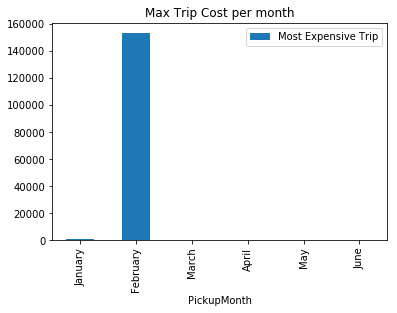

In [13]:
# Question 5

MonthlyExpensive = RawData.groupby('PickupMonth').apply(lambda x: x.loc[x['fare_amount'].idxmax()]).rename(columns = {'fare_amount':'Most Expensive Trip'}).reset_index(drop=True)
MonthlyExpensive['PickupMonth'] = MonthlyExpensive['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyExpensive = MonthlyExpensive.set_index('PickupMonth')
printHTML_DF(MonthlyExpensive[['Most Expensive Trip']])
MonthlyExpensive[['Most Expensive Trip']].plot(kind = 'bar', title="Max Trip Cost per month")

print("\nHighest Most Expensive Trip is in the month of " + str(MonthlyExpensive['Most Expensive Trip'].idxmax()))

,DropoffAddress,No. of Dropoffs
PickupMonth,,
January,"Aloft New York LaGuardia Airport, 100-15, Ditm...",865
January,"John F Kennedy International Airport, Bayswate...",1617
February,"Aloft New York LaGuardia Airport, 100-15, Ditm...",963
February,"John F Kennedy International Airport, Bayswate...",1720
March,"Aloft New York LaGuardia Airport, 100-15, Ditm...",1218
March,"John F Kennedy International Airport, Bayswate...",2099
April,"Aloft New York LaGuardia Airport, 100-15, Ditm...",1119
April,"John F Kennedy International Airport, Bayswate...",2107
May,"Aloft New York LaGuardia Airport, 100-15, Ditm...",1382



Maximum Airport Drops per Month


,DropoffAddress,Maximum No. of Drops
PickupMonth,,
January,"John F Kennedy International Airport, Bayswate...",1617
February,"John F Kennedy International Airport, Bayswate...",1720
March,"John F Kennedy International Airport, Bayswate...",2099
April,"John F Kennedy International Airport, Bayswate...",2107
May,"John F Kennedy International Airport, Bayswate...",2353
June,"John F Kennedy International Airport, Bayswate...",2193


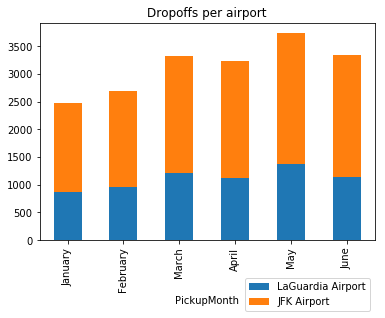

In [14]:
# Question 6
AirportsList = ["Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens County, NYC, New York, 11369, United States of America","John F Kennedy International Airport, Bayswater, Queens County, NYC, New York, 11434, United States of America"]
Airports={}
Airports[AirportsList[0]] = "LaGuardia Airport"
Airports[AirportsList[1]] = "JFK Airport"

MonthlyAirportDropoffs = RawData[RawData.DropoffAddress.isin(AirportsList)]
MonthlyAirportDropoffs = MonthlyAirportDropoffs[['PickupMonth','DropoffAddress','tpep_pickup_datetime']].groupby(['PickupMonth','DropoffAddress']).count().reset_index(drop=False).rename(columns={'tpep_pickup_datetime':'No. of Dropoffs'}).sort_values("PickupMonth")

MonthlyMaxAirport = MonthlyAirportDropoffs.groupby(['PickupMonth']).apply(lambda x: x.loc[x['No. of Dropoffs'].idxmax()]).reset_index(drop=True)
MonthlyAirportDropoffsWide = MonthlyAirportDropoffs.pivot(index="PickupMonth", columns = "DropoffAddress", values = "No. of Dropoffs").rename(columns = Airports).reset_index(drop=False)

MonthlyAirportDropoffs['PickupMonth'] = MonthlyAirportDropoffs['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyAirportDropoffs = MonthlyAirportDropoffs.set_index('PickupMonth')
printHTML_DF(MonthlyAirportDropoffs)

MonthlyMaxAirport['PickupMonth'] = MonthlyMaxAirport['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyMaxAirport = MonthlyMaxAirport.rename(columns = {"No. of Dropoffs":"Maximum No. of Drops"}).set_index('PickupMonth')
print("\nMaximum Airport Drops per Month")
printHTML_DF(MonthlyMaxAirport)

MonthlyAirportDropoffsWide['PickupMonth'] = MonthlyAirportDropoffsWide['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyAirportDropoffsWide = MonthlyAirportDropoffsWide.set_index('PickupMonth')
plt = MonthlyAirportDropoffsWide.plot(kind='bar',stacked=True, title="Dropoffs per airport")
plt.legend(loc=9, bbox_to_anchor=(0.8, -0.15))

,Max Payments Type,No. of Payments,total_amount
PickupMonth,,,
January,1,37246,839284.22
February,1,39444,868359.63
March,1,39017,912292.65
April,1,40420,945806.32
May,1,37828,928534.09
June,1,39048,933628.15


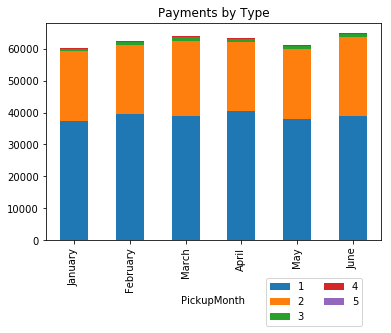

In [15]:
# Question 7
MonthlyCommonPaymentMaster = RawData[['PickupMonth','payment_type','total_amount']].groupby(['PickupMonth', 'payment_type']).count().reset_index(drop=False)
MonthlyCommonPayment = MonthlyCommonPaymentMaster.groupby(['PickupMonth']).apply(lambda x: x.loc[x['total_amount'].idxmax()]).reset_index(drop=True).rename(columns = {'total_amount':'No. of Payments', 'payment_type':'Max Payments Type'})
MonthlyCommonPayment2 = RawData[['PickupMonth','payment_type','total_amount']].groupby(['PickupMonth', 'payment_type']).sum().reset_index(drop=False)

MonthlyCommonPayment = pd.merge(MonthlyCommonPayment, MonthlyCommonPayment2, how = 'left', left_on=["PickupMonth","Max Payments Type"], right_on = ["PickupMonth", "payment_type"]).drop(columns = ["payment_type"]).rename(columns = {'total_fare':'Total Amount Paid via Method'})

MonthlyCommonPayment['PickupMonth'] = MonthlyCommonPayment['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyCommonPayment = MonthlyCommonPayment.set_index('PickupMonth')

printHTML_DF(MonthlyCommonPayment)

MonthlyCommonPaymentMaster = MonthlyCommonPaymentMaster.pivot(index="PickupMonth", columns = "payment_type", values = "total_amount").reset_index(drop=False)

MonthlyCommonPaymentMaster['PickupMonth'] = MonthlyCommonPaymentMaster['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyCommonPaymentMaster = MonthlyCommonPaymentMaster.set_index('PickupMonth')
plt = MonthlyCommonPaymentMaster.plot(kind='bar',stacked=True, title="Payments by Type")
plt.legend(loc=9, bbox_to_anchor=(0.8, -0.15), ncol = 2)

# print(MonthlyPickupSlot)

In [16]:
# Question 8
MonthlyMaxLocationPickup = RawData[['PickupMonth','PickupAddress','tpep_pickup_datetime']].groupby(['PickupMonth', 'PickupAddress']).count().reset_index(drop=False)
MonthlyMaxLocationPickup = MonthlyMaxLocationPickup.groupby(['PickupMonth']).apply(lambda x: x.loc[x['tpep_pickup_datetime'].idxmax()]).reset_index(drop=True).rename(columns = {'tpep_pickup_datetime':'No. of Pickups', 'PickupAddress':'Max Pickups Location'})
MonthlyMaxLocationPickup['PickupMonth'] = MonthlyMaxLocationPickup['PickupMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyMaxLocationPickup= MonthlyMaxLocationPickup.set_index('PickupMonth')
printHTML_DF(MonthlyMaxLocationPickup)

# gmap = gmplot.GoogleMapPlotter(40.7128, -74.0060, 10)
# gmap.heatmap(RawData['pickup_latitude'], RawData['pickup_longitude'])
# gmap.draw(OutputFolder+"Pickups.html")
# GenerateJupyterLink(OutputFolder+"Pickups.html", "Click Here to view Dropoffs heatmap")

MonthlyMaxLocationDropoff = RawData[['DropoffMonth','DropoffAddress','tpep_dropoff_datetime']].groupby(['DropoffMonth', 'DropoffAddress']).count().reset_index(drop=False)
MonthlyMaxLocationDropoff= MonthlyMaxLocationDropoff.groupby(['DropoffMonth']).apply(lambda x: x.loc[x['tpep_dropoff_datetime'].idxmax()]).reset_index(drop=True).rename(columns = {'tpep_dropoff_datetime':'No. of Dropoffs', 'DropoffAddress':'Max Dropoffs Location'})
MonthlyMaxLocationDropoff['DropoffMonth'] = MonthlyMaxLocationDropoff['DropoffMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyMaxLocationDropoff= MonthlyMaxLocationDropoff.set_index('DropoffMonth')
printHTML_DF(MonthlyMaxLocationDropoff)

# gmap = gmplot.GoogleMapPlotter(40.7128, -74.0060, 10)
# gmap.heatmap(RawData['dropoff_latitude'], RawData['dropoff_longitude'])
# gmap.draw(OutputFolder+"Dropoffs.html")
# GenerateJupyterLink(OutputFolder+"Dropoffs.html", "Click Here to view Dropoffs heatmap")


,Max Pickups Location,No. of Pickups
PickupMonth,,
January,"137, West 33rd Street, Koreatown, Manhattan Co...",3553
February,"137, West 33rd Street, Koreatown, Manhattan Co...",3638
March,"137, West 33rd Street, Koreatown, Manhattan Co...",4098
April,"137, West 33rd Street, Koreatown, Manhattan Co...",3766
May,"137, West 33rd Street, Koreatown, Manhattan Co...",3617
June,"137, West 33rd Street, Koreatown, Manhattan Co...",3859


,Max Dropoffs Location,No. of Dropoffs
DropoffMonth,,
January,"35, East 38th Street, Manhattan Community Boar...",2827
February,"35, East 38th Street, Manhattan Community Boar...",3023
March,"35, East 38th Street, Manhattan Community Boar...",3460
April,"35, East 38th Street, Manhattan Community Boar...",2908
May,"35, East 38th Street, Manhattan Community Boar...",2781
June,"1270 Avenue of the Americas, 1270, 6th Avenue,...",2987
July,"137, West 33rd Street, Koreatown, Manhattan Co...",2


count                     12089
mean     0 days 00:44:32.682604
std      0 days 00:22:09.588924
min             0 days 00:00:00
25%             0 days 00:33:00
50%             0 days 00:45:00
75%             0 days 00:58:00
max             0 days 08:30:00
Name: TripLength, dtype: object


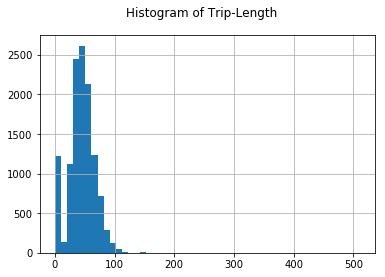

In [17]:
# Question 9
TripsToJFK = deepcopy(RawData[RawData.DropoffAddress == "John F Kennedy International Airport, Bayswater, Queens County, NYC, New York, 11434, United States of America"])
TripsToJFK["TripLength"] = TripsToJFK["tpep_dropoff_datetime"] - TripsToJFK["tpep_pickup_datetime"]

print(TripsToJFK["TripLength"].describe())
TripLengthSeries = TripsToJFK['TripLength'].astype('timedelta64[s]').divide(60)
plt = TripLengthSeries.hist(bins = 50)
pl.suptitle("Histogram of Trip-Length")

In [18]:
# Question 10
NightHotspots = deepcopy(RawData[RawData.DropoffSlot == "21:00 - 04:00"])
MonthlyNightHotspots = NightHotspots[['DropoffMonth','DropoffAddress','tpep_dropoff_datetime']].groupby(['DropoffMonth', 'DropoffAddress']).count().reset_index(drop=False)
MonthlyNightHotspots= MonthlyNightHotspots.groupby(['DropoffMonth']).apply(lambda x: x.loc[x['tpep_dropoff_datetime'].idxmax()]).reset_index(drop=True).rename(columns = {'tpep_dropoff_datetime':'No. of Dropoffs', 'DropoffAddress':'Max Dropoffs Location'})
MonthlyNightHotspots['DropoffMonth'] = MonthlyNightHotspots['DropoffMonth'].apply(lambda x:datetime.date(1900,x,1).strftime('%B'))
MonthlyNightHotspots= MonthlyNightHotspots.set_index('DropoffMonth')
printHTML_DF(MonthlyNightHotspots)


gmap = gmplot.GoogleMapPlotter(40.7128, -74.0060, 10)
gmap.heatmap(NightHotspots['dropoff_latitude'], NightHotspots['dropoff_longitude'])
gmap.draw(OutputFolder+"NightSpots.html")
GenerateJupyterLink(OutputFolder+"NightSpots.html", "Click Here to view Nightspots heatmap")

,Max Dropoffs Location,No. of Dropoffs
DropoffMonth,,
January,"35, East 38th Street, Manhattan Community Boar...",493
February,"35, East 38th Street, Manhattan Community Boar...",512
March,"341, West 45th Street, Hell's Kitchen, Manhatt...",689
April,"341, West 45th Street, Hell's Kitchen, Manhatt...",497
May,"137, West 33rd Street, Koreatown, Manhattan Co...",460
June,"137, West 33rd Street, Koreatown, Manhattan Co...",602
July,"137, West 33rd Street, Koreatown, Manhattan Co...",2
